### Importações

In [11]:
import numpy as np
import pygame
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from lmfit import Model

### Simulação

In [12]:

# Inicialização do pygame
pygame.init()

# Parâmetros
num_atoms = 120
temperatura = 8 # em Kelvin
raio = 4
massa = 20
raioB = 8
massaB = 30

# Parâmetros da janela
width, height = 800, 600
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Simulação da Colisão Elástica")

# Cores
white = (255, 255, 255)
red = (255, 0, 0)
azul = (0, 0, 255)
color = red
### Preciso definir as bolinhas, quem são e como serão representadas

## Tem uma velocidade no eixo x, velocidade no eixo y, posição inicial em x e posição inicial em y

## Vamos fazer a representação das bolinhas utilizando matrizes do numpy, preenchida com zeros e 1, sendo 1 a representação dela
class atomo:
    """Essa classe irá representar os nossos átomos,
    
    Terá a posição inicial deles, sua velocidade em x e y, e o seu raio."""
    
    def __init__(self, tipo, x,y, raio, temperatura, massa, syles=None):
        '''definindo como que cada parâmetro irá se inicializar'''
    
        #Para gerar os valores aleatórios vamos utilizar uma função do numpy chamda random uniform que gera valores aleatórios seguindo 
        ## um intervalo de valores específicado
        self.tipo = tipo
        self.p = np.array((x,y)) #defino a posição das bolinhas
        vx = random.randint(-4,4)
        vy = random.randint(-4,4)
        self.v = np.array((vx,vy))
        self.caract = np.array((temperatura,massa,raio)) #Definindo características das bolinhas
      
    # Movimento das bolinhas
    
    def movimento(self, dt = 0.75):
        
    
        self.p = self.p + self.v *dt

        #Restringir a região das bolinhas

        self.p[0] = max(self.caract[2], min(self.p[0], width - self.caract[2]))
        self.p[1] = max(self.caract[2], min(self.p[1], height - self.caract[2]))
        
    #Verificando se há colisão entre elas
    
    def verifica_colisao(self,b2):
        distance = math.sqrt((self.p[0] - b2.p[0])**2 + (self.p[1] - b2.p[1])**2)
        return distance <= self.caract[2] + b2.caract[2]
     

    def aplica_colisao(self,b2):
        
        dx = b2.p[0] - self.p[0]
        dy = b2.p[1] - self.p[1]
        
        distancia = math.sqrt(dx**2 + dy**2)
        
        dx_futuro = (b2.p[0] + b2.v[0]) - (self.p[0] + self.v[0])
        dy_futuro = (b2.p[1] + b2.v[1]) - (self.p[1] + self.v[1])
        distancia_futura = math.sqrt(dx_futuro**2 + dy_futuro**2)
        
        if distancia_futura < distancia:
            m1,m2 = 4e-23, 4e-23#self.caract[2]**2, b2.caract[2]**2
            M = m1 + m2
            r1,r2 = self.p, b2.p
            
            d = np.linalg.norm(r1-r2)**2
                
            v1, v2 = abs(self.v), abs(b2.v)
            u1 = v1 - 2*m2/M *(np.dot(v1-v2,r1-r2)/d)* (r1-r2)
            u2 = v2 - 2*m1/M * np.dot(v2-v1,r2-r1)/d * (r2-r1)
            self.v = u1
            b2.v = -u2
    
    def colisao_parede(self):
        
            # Refletir a direção da bola quando colide com as paredes
        if (self.p[0] - self.caract[2] <= 0).any(): #and self.v[0] < 0
            self.v[0] = (-self.v[0])          
            
            
        if (self.p[0] + self.caract[2] >= width).any(): #and self.v[0] > 0:
            self.v[0] = (-self.v[0]) 

        if (self.p[1] - self.caract[2] <= 0).any(): #and self.v[1] < 0:
            self.v[1] = (-self.v[1]) 
            
        if (self.p[1] + self.caract[2] >= height).any(): # and self.v[1] > 0 :
            self.v[1] = (-self.v[1]) 
                

#lista de atomos

atomos = []
tipo = "A"

for _ in range(num_atoms):
    valid_position = False
    while not valid_position:
        x = random.randint(50, width - 50)
        y = random.randint(50, height - 50)
    
        # Verificar se a posição não está muito próxima de outras posições já escolhidas
        if all(math.sqrt((x-atom.p[0])**2 + (y - atom.p[1])**2) >= 3 * atom.caract[2] for atom in atomos):
            if all(math.sqrt((x - atom.p[0])**2 + (y - atom.p[1])**2) >= 3 * atom.caract[2] for atom in atomos):
                valid_position = True

    atom = atomo(tipo, x, y, raio, temperatura, massa)
    atomos.append(atom)

# Dicionários com a informações das velocidades e concentração





 # Loop principal
evolucao = {}
tempos = []
concentracoes = []
running = True
clock = pygame.time.Clock()
dt = 0.75
n = -1
while running:
    n+=1
    color = red
    c_A = 0
    c_B = 0
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    window.fill(white)

    for atom in atomos:
        atom.movimento(dt=dt)
        atom.colisao_parede()
        
        if atom.tipo == "A":
            c_A+=1
        
        if atom.tipo == "B":
            c_B+=1
            color = azul
        
        pygame.draw.circle(window, color, (int(atom.p[0]), int(atom.p[1])), atom.caract[2])

    # Verificar colisões
    lista_remover = []
    atomos_num = []
    for i in range(len(atomos)):
        for j in range(i + 1, len(atomos)):
            if atomos[i].verifica_colisao(atomos[j]):
                if atomos[i].tipo == "A" and atomos[i].tipo == atomos[j].tipo: 
                    
                    x_novo = (atomos[i].p[0] + atomos[j].p[0])/2
                    y_novo = (atomos[i].p[1] + atomos[j].p[1])/2
                    
                    atom = atomo("B", x_novo, y_novo, raioB, temperatura, massaB)
                    atomos_num.append(1)
                    atomos.append(atom)
                    
                    lista_remover.append(atomos[i])
                    lista_remover.append(atomos[j])
                    #atomos[i].aplica_colisao(atomos[j])
                    
                else:
                    atomos[i].aplica_colisao(atomos[j])
    
    # problema: o que estava no índice j não está mais, pois a lista mudou de tamanho quando o i foi deletado
    
    if len(lista_remover) != 0:
        for c in lista_remover:
            atomos.remove(c)

    
    pygame.display.flip()
    clock.tick(200)
    
    # Cálculo da velocidade
    concentracoes.append(sum(atomos_num))
    tempos.append(pygame.time.get_ticks())
    if sum(atomos_num) != len(atomos): 
        tempo = pygame.time.get_ticks()
        
    evolucao[n] = {}
    evolucao[n]["tempo"] = n*dt
    
    evolucao[n]["A"] = c_A
    
    evolucao[n]["B"] = c_B

pygame.quit()


### Distribuição das velocidades

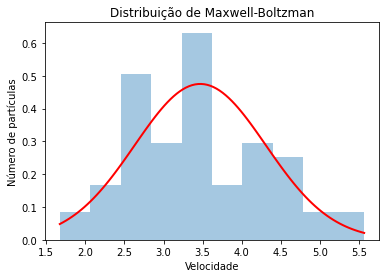

In [13]:
velocidades = []

for i in range(len(tempos) - 1):
    velocidades.append(concentracoes[i]/tempos[i])

# Coletar as velocidades das partículas ao longo do tempo
velocidades = []
for a in atomos:
    v_norm = (((a.v[0])**2)+((a.v[1])**2))**(1/2)
    velocidades.append(v_norm)

# Criar um histograma das velocidades
plt.figure()
plt.hist(velocidades, bins=10, density=True, alpha=0.4)

# Ajustar os dados a uma distribuição gaussiana usando a função norm.fit()
mu, sigma = norm.fit(velocidades)

# Calcular a distribuição gaussiana ajustada
x = np.linspace(np.min(velocidades), np.max(velocidades), 100)
normalizado = norm.pdf(x, mu, sigma)
plt.plot(x, normalizado,  color='red',linewidth=2)
plt.xlabel('Velocidade')
plt.ylabel('Número de partículas')
plt.title('Distribuição de Maxwell-Boltzman')
plt.show()
        

### Concentração de reagentes e produtos

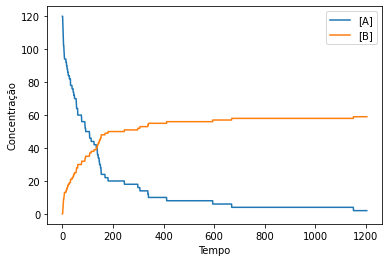

In [14]:
tempos = []
concentracao_A = []
concentracao_B = []

for item in evolucao:
    tempos.append(evolucao[item]["tempo"])
    concentracao_A.append(evolucao[item]["A"])
    concentracao_B.append(evolucao[item]["B"])

plt.plot(tempos, concentracao_A, label = '[A]')
plt.plot(tempos, concentracao_B , label = '[B]')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Concentração')
#plt.savefig('concentracoes.png')
plt.show()

### Fit dos dados

Utiliza um modelo de fit que é comumente utilizado para descrever a viscosidade de líquidos em função da temperatura,
mas que funcionou de forma satisfatória para a descrição da variação da concentração de reagentes em função do tempo. Nesse tipo de modelagem, a equação de VFT é dada por 


[A] = [A_0] * exp(B/(t  = t_0)). 

Para utilizarmos esse modelo, aplicamos o logaritmo natural de ambos os lados, obtendo a função modelo abaixo.




In [70]:
def VFT(T, log_concentracao_A0, K, T0):
    log_concentracao = log_concentracao_A0 +  K / (T - T0)
    return log_concentracao

Variável independente: ['T']
Parâmetros do modelo: ['log_concentracao_A0', 'K', 'T0']
Variável independente: ['T']
Parâmetros do modelo: ['log_concentracao_A0', 'K', 'T0']


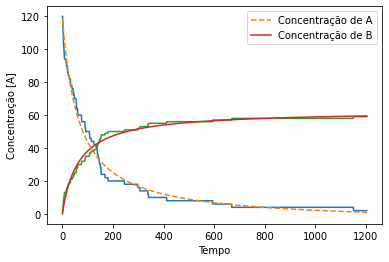

In [78]:
l = 0
melhores_fits = []

for y_log in [concentracao_A, concentracao_B]:
    x = tempos
    #y_log = concentracao_A

    modelo_VFT = Model(VFT)

    print(f'Variável independente: {modelo_VFT.independent_vars}')

    print(f'Parâmetros do modelo: {modelo_VFT.param_names}')

    params = modelo_VFT.make_params(log_concentracao_A0=-8, K=1000, T0=-100)

    resultado_fit = modelo_VFT.fit(y_log, params, T=x)
    
    melhores_fits.append(resultado_fit.best_fit)
    if l == 0:
        plt.plot(x, y_log)
        plt.plot(x, resultado_fit.best_fit, linestyle='--', label='Concentração de A') 
    else:#
        plt.plot(x, y_log)
        plt.plot(x, resultado_fit.best_fit, label='Concentração de B')
    l+=1
    
plt.xlabel('Tempo')
plt.ylabel('Concentração [A]')
plt.legend()
plt.savefig('exemplo_fit_curva.png')
plt.show()

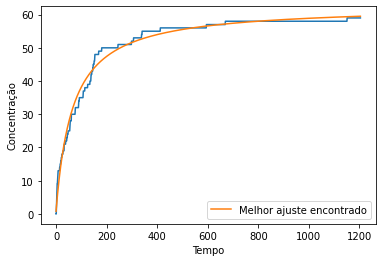

In [79]:
# Plot somente da concentração de A

plt.plot(x, y_log)
plt.plot(x, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

### Cálculo da derivada da concentração do reagente A (velocidade)

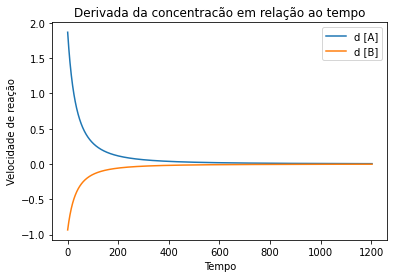

In [83]:
j = 0
for i in melhores_fits:
    y_p = np.diff(i) / np.diff(x)
    x_p = (np.array(x)[:-1] + np.array(x)[1:]) / 2

    derivada = np.array(y_p)*-1
    
    if j == 0:
       plt.plot(x_p, derivada, label='d [A]')
    else:
        plt.plot(x_p, derivada, label='d [B]')
    j+=1
    
plt.xlabel('Tempo')
plt.ylabel('Velocidade de reação')
plt.legend()
plt.title('Derivada da concentracão em relação ao tempo')
plt.show()

### Gráfico do logaritmo da concentração de A

Como é uma reação de primeira ordem, esse gráfico deve ter comportamento linear. Assim, o coeficiente angular da reta que fita os dados equivale ao coeficiente de taxa de reação (K).

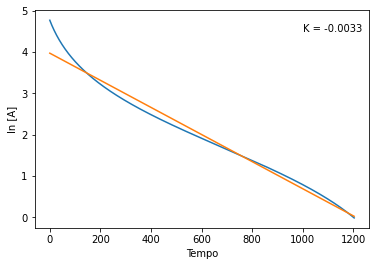

Coeficiente de taxa de reação: -0.0032828595623130828


In [81]:
y_novo = []
for i in melhores_fits[0]:
    y_novo.append(np.log(i))

# Ajustando uma reta de grau 1 (uma reta) aos pontos
coeficientes = np.polyfit(x, y_novo, 1)

# Coeficiente angular da reta
slope = coeficientes[0]
reta2 = np.poly1d(coeficientes)

k_value = f'K = {coeficientes[0]:.4f}'  # Formatando o valor de K

plt.plot(x, y_novo)
plt.plot(x, reta2(x))
plt.text(1000, 4.5, k_value, fontsize=10, color='black')
#plt.plot(x, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.xlabel('Tempo')
plt.ylabel('ln [A]')
#plt.legend()
plt.savefig('ln_concentracaoXtempo.png')
plt.show()

print("Coeficiente de taxa de reação:", slope)

### Lei da velocidade 

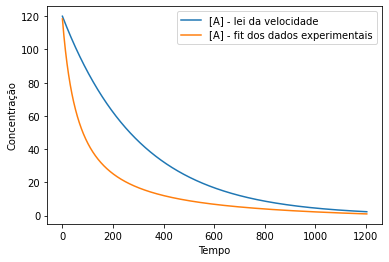

In [96]:
concentracoes_reacao = []      
for i in tempos:
    concentracoes_reacao.append(num_atoms*np.exp(slope*i))

plt.plot(tempos, concentracoes_reacao, label = '[A] - lei da velocidade')
plt.plot(tempos, melhores_fits[0], label = '[A] - fit dos dados experimentais')
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

### Cálculo do coeficiente pela fórmula

$K = \frac{ln[A] - ln[A_0]}{t - t_0}$

In [98]:
n = int(len(melhores_fits[0])) - 1
delta_tempo = (x[n] - x[0])
k_formula = np.log(melhores_fits[0][n]/melhores_fits[0][0])/delta_tempo

print("Coeficiente determinado pela fórmula:", k_formula)

Coeficiente determinado pela fórmula: -0.003978191057626306


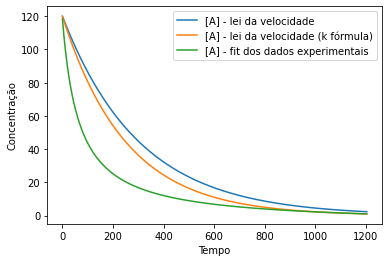

In [100]:
concentracoes_reacao2 = []      
for i in tempos:
    concentracoes_reacao2.append(num_atoms*np.exp(k_formula*i))

plt.plot(tempos, concentracoes_reacao, label = '[A] - lei da velocidade')
plt.plot(tempos, concentracoes_reacao2, label = '[A] - lei da velocidade (k fórmula)')
plt.plot(tempos, melhores_fits[0], label = '[A] - fit dos dados experimentais')
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

### Variação da primeira derivada para diferentes concentrações

Os dados utilizados para esse gráfico foram obtidos rodando o mesmo código para diferentes concentrações.

y: derivada da concentração em um instante t

x: números de reagentes no sistema inicial


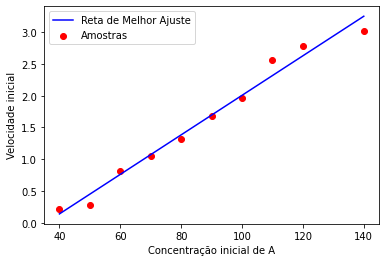

Coeficiente da reta: 0.03105141117446897


In [54]:
y = [0.22522327, 0.28877750872131475, 0.818069704403778, 1.0446304613446575, 1.3209549128583642, 1.6775185718821792, 1.9660003008353517, 2.55827526, 2.78552949, 3.02296744]
x = [40, 50, 60, 70, 80, 90, 100, 110, 120, 140] 
 
# Ajustando uma reta de grau 1 (uma reta) aos pontos
coeficientes = np.polyfit(x, y, 1)
 
# Criando uma função de reta com base nos coeficientes encontrados
reta = np.poly1d(coeficientes)
 
# Plotar os pontos
plt.scatter(x, y, color='red', marker='o', label='Amostras')
 
# Plotar a reta de melhor ajuste
plt.plot(x, reta(x), color='blue', label='Reta de Melhor Ajuste')
 
# Adicionar rótulos aos eixos
plt.xlabel('Concentração inicial de A')
plt.ylabel('Velocidade inicial')
 
# Adicionar um título ao gráfico
 
# Adicionar uma legenda
plt.legend()

# Exibir o gráfico
plt.savefig('primeira_velocidade.png')
plt.show()
print("Coeficiente da reta:", coeficientes[0]) 


### Gráfico do inverso da concentração em função do tempo

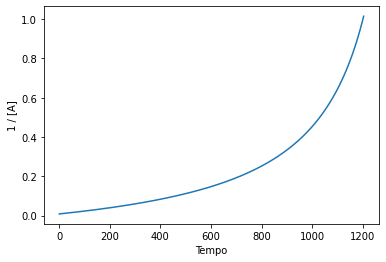

In [56]:
melhores_fits[0]
y_novo = []

for i in melhores_fits[0]:
    y_novo.append(1/i)

plt.plot(tempos,y_novo)

plt.xlabel('Tempo')
plt.ylabel('1 / [A]')
plt.savefig('inversa_concentracaoXtempo.png')
plt.show()